# Angle subtended on the slicer by each MRS detector pixel in each spectral band

The angle subtended by each pixel on the sky depends on the distortion affecting the pixel. It also depends on the MRS spectral channel. The four MRS channels have different field of view extents.

In [1]:
import funcs

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'notebooks/distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

In [5]:
sliceMap,lambdaULMap,lambdaLRMap = {},{},{}
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    # Load distortion information
    d2cMaps = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)
    sliceMap[band]   = d2cMaps['sliceMap']
    lambdaULMap[band] = d2cMaps['lambdaULMap']
    lambdaLRMap[band] = d2cMaps['lambdaLRMap']

<IPython.core.display.Javascript object>


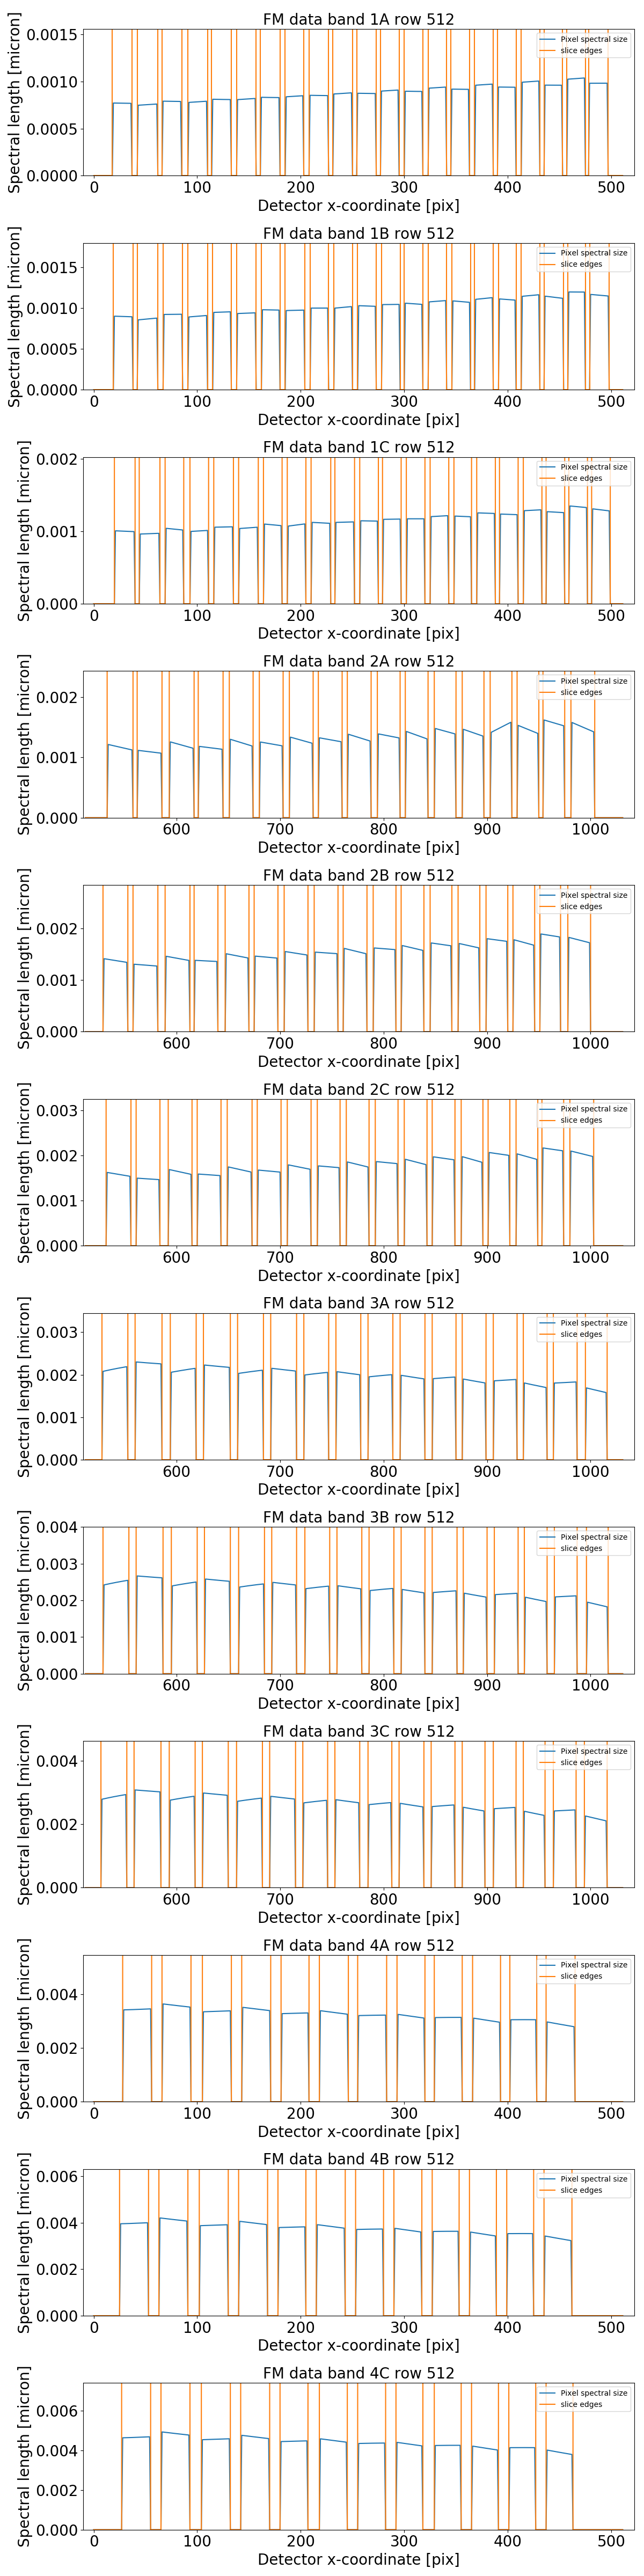

In [6]:
plt.close('all')
fig,axs = plt.subplots(12,1,figsize=(12,48))
for plot,band in enumerate(['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']):
    axs[plot].set_title('FM data band {} row 512'.format(band),fontsize=20)
    spectralsizeMap = abs(lambdaULMap[band]-lambdaLRMap[band])
    if band[0] in ['1','4']:
        axs[plot].plot(spectralsizeMap[512,:512],label='Pixel spectral size')
        axs[plot].plot(sliceMap[band][512,:512],label='slice edges')
        axs[plot].set_ylim(0,1.5*np.max(spectralsizeMap[512,:512][~np.isnan(spectralsizeMap[512,:512])]))
        axs[plot].set_xlim(-10,522)
    elif band[0] in ['2','3']:
        axs[plot].plot(512+np.arange(len(spectralsizeMap[512,512:])),spectralsizeMap[512,512:],label='Pixel spectral size')
        axs[plot].plot(512+np.arange(len(sliceMap[band][512,512:])),sliceMap[band][512,512:],label='slice edges')
        axs[plot].set_ylim(0,1.5*np.max(spectralsizeMap[512,512:][~np.isnan(spectralsizeMap[512,512:])]))
        axs[plot].set_xlim(510,1042)
    axs[plot].set_xlabel('Detector x-coordinate [pix]',fontsize=20)
    axs[plot].set_ylabel(r'Spectral length [micron]',fontsize=20)
    axs[plot].legend(loc='upper right',fontsize=10)
    axs[plot].tick_params(axis='both',labelsize=20)
plt.tight_layout()

<IPython.core.display.Javascript object>


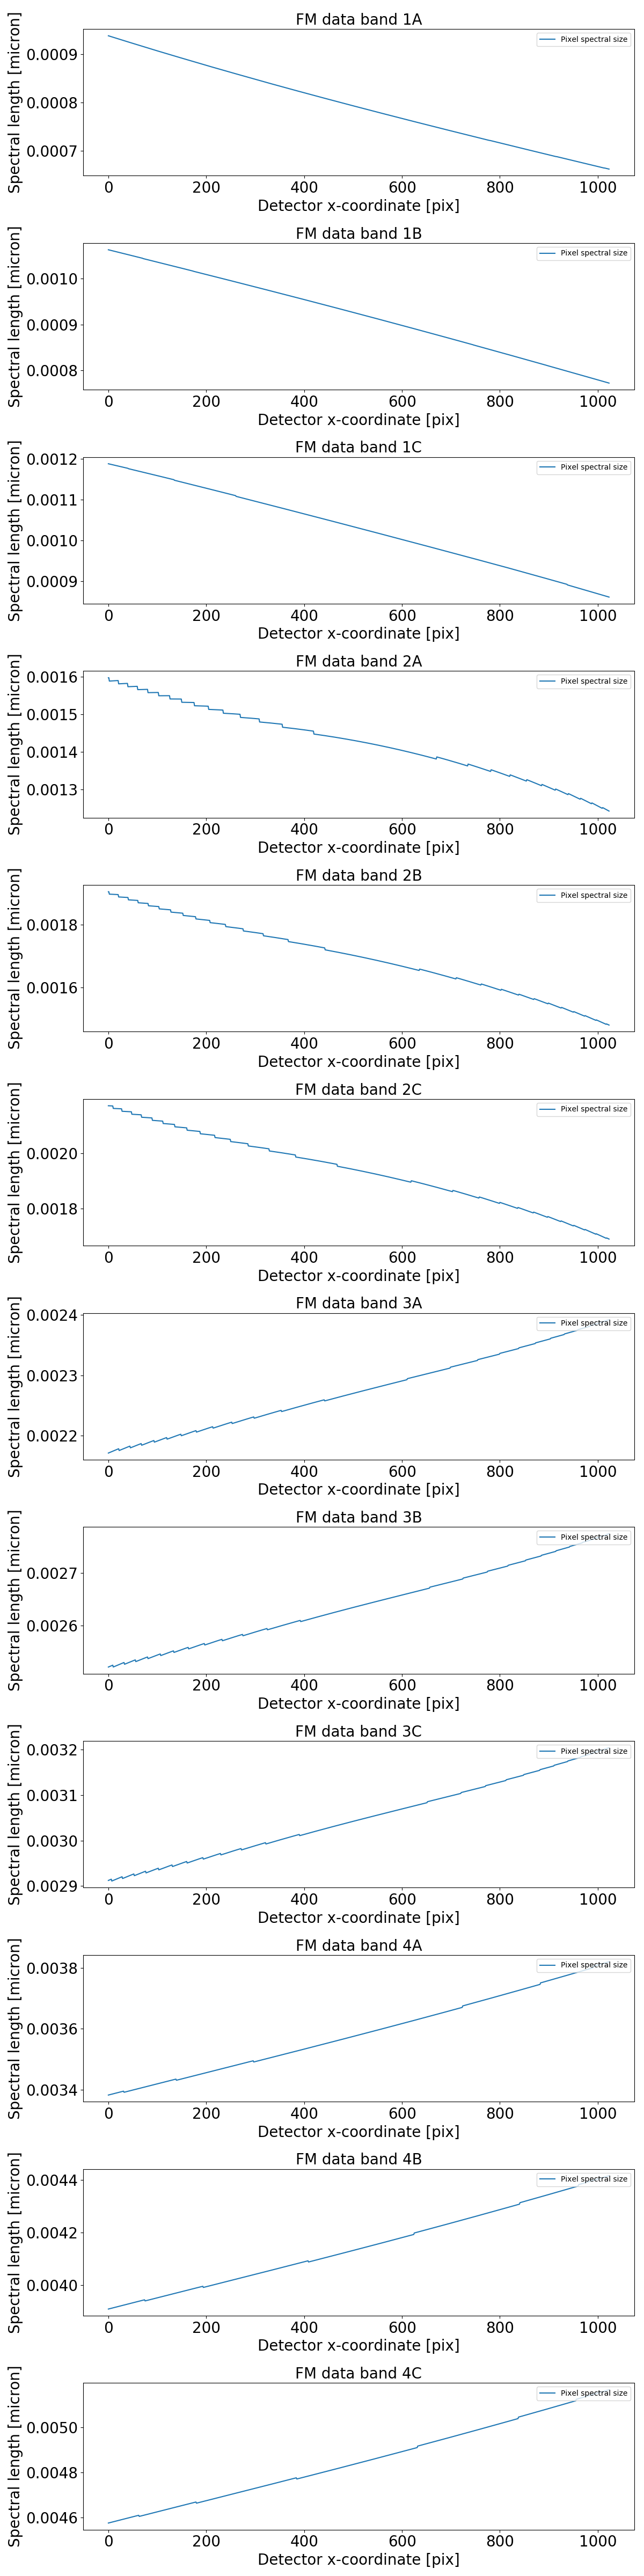

In [11]:
plt.close('all')
fig,axs = plt.subplots(12,1,figsize=(12,48))
for plot,band in enumerate(['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']):
    axs[plot].set_title('FM data band {}'.format(band),fontsize=20)
    spectralsizeMap = abs(lambdaULMap[band]-lambdaLRMap[band])
    d2cMaps = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)
    ypos,xpos = funcs.detpixel_trace(band,d2cMaps,sliceID=d2cMaps['nslices']/2,alpha_pos=0)
    axs[plot].plot(spectralsizeMap[ypos,xpos][np.nonzero(spectralsizeMap[ypos,xpos])],label='Pixel spectral size')
    axs[plot].set_xlabel('Detector x-coordinate [pix]',fontsize=20)
    axs[plot].set_ylabel(r'Spectral length [micron]',fontsize=20)
    axs[plot].legend(loc='upper right',fontsize=10)
    axs[plot].tick_params(axis='both',labelsize=20)
plt.tight_layout()

<IPython.core.display.Javascript object>


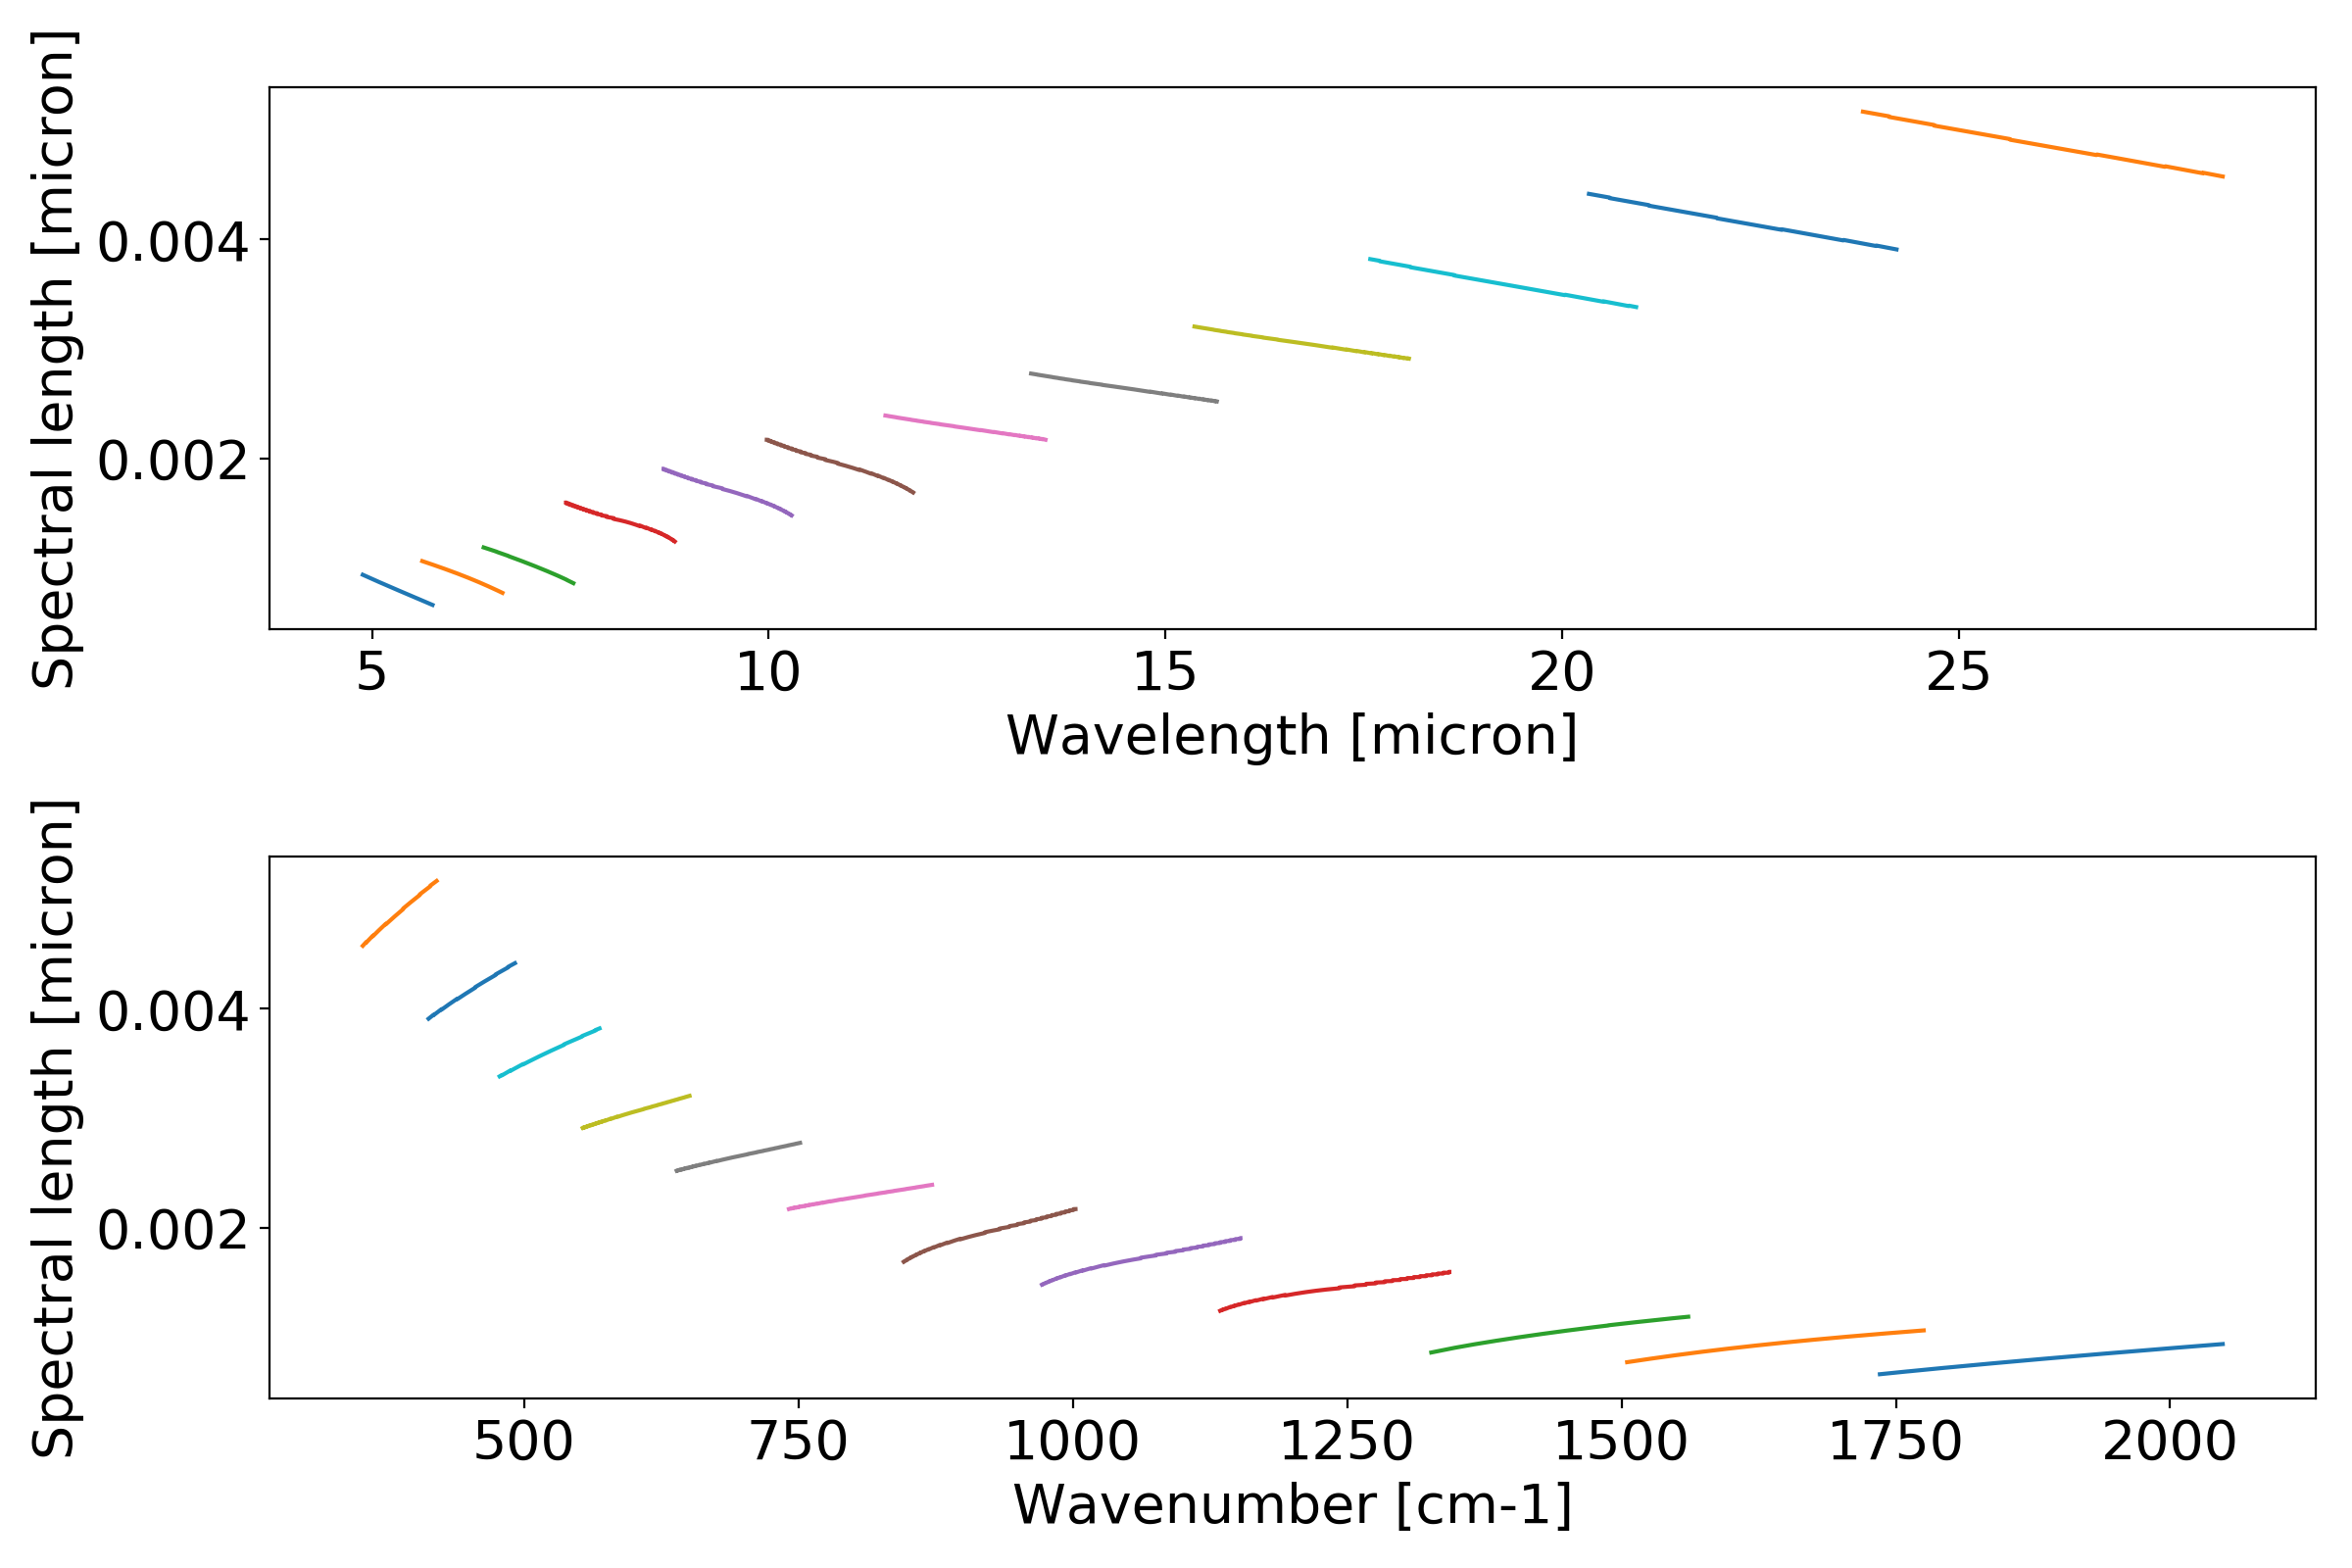

In [4]:
plt.close('all')
fig,axs = plt.subplots(2,1,figsize=(12,8))
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    spectralsizeMap = abs(lambdaULMap[band]-lambdaLRMap[band])
    d2cMaps = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
    ypos,xpos = funcs.detpixel_trace(band,d2cMaps,sliceID=d2cMaps['nslices']/2,alpha_pos=0)
    axs[0].plot(d2cMaps['lambdaMap'][ypos,xpos],spectralsizeMap[ypos,xpos][np.nonzero(spectralsizeMap[ypos,xpos])])
    axs[1].plot(np.flipud(10000./d2cMaps['lambdaMap'][ypos,xpos]),np.flipud(spectralsizeMap[ypos,xpos][np.nonzero(spectralsizeMap[ypos,xpos])]))
axs[0].set_xlabel('Wavelength [micron]',fontsize=20)
axs[1].set_xlabel('Wavenumber [cm-1]',fontsize=20)
for plot in range(2):
    axs[plot].set_ylabel(r'Spectral length [micron]',fontsize=20)
    axs[plot].tick_params(axis='both',labelsize=20)
plt.tight_layout()

### Remark:
A smaller spectral size over the wavelength range means that if a line is sampled over ~2.5 pixels, effectively the spectral resolution is larger at larger wavelengths. This is what was found/computed for the MRS, so it checks out.

In [10]:
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    spectralsizeMap = abs(lambdaULMap[band]-lambdaLRMap[band])
    d2cMaps = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
    ypos,xpos = funcs.detpixel_trace(band,d2cMaps,sliceID=d2cMaps['nslices']/2,alpha_pos=0)
    print 'Sum of spectral sizes, band {}: {}micron'.format(band,round(sum(spectralsizeMap[ypos,xpos][~np.isnan(spectralsizeMap[ypos,xpos])]),3))

Sum of spectral sizes, band 1A: 0.813micron
Sum of spectral sizes, band 1B: 0.943micron
Sum of spectral sizes, band 1C: 1.053micron
Sum of spectral sizes, band 2A: 1.46micron
Sum of spectral sizes, band 2B: 1.739micron
Sum of spectral sizes, band 2C: 1.984micron
Sum of spectral sizes, band 3A: 2.33micron
Sum of spectral sizes, band 3B: 2.704micron
Sum of spectral sizes, band 3C: 3.122micron
Sum of spectral sizes, band 4A: 3.673micron
Sum of spectral sizes, band 4B: 4.247micron
Sum of spectral sizes, band 4C: 4.969micron
